# Exercie 2  : **importance sampling**

In [3]:
import numpy as np
from typing import List
import matplotlib.pyplot as plt 

In [4]:
# constante :
S0 =100
r = 0.03 
sigma = 0.2 
T = 2 
K = 120
beta = 0.75 
n = 50000
gamma = 0.001
M = 50000

### Question 1:

In [12]:
# Implémentation de la suite (tetha_n)_n :



def fun_psi(g  , theta : float) -> float:
    b = S0*np.exp((r - sigma**2/2)*T + sigma*np.sqrt(T)*(g + theta))
    a = 0 
    if  isinstance(g,float) :
        a = max(b - K , 0)
    else : 
        a = b  - K 
        for  i in range(len(b)) :
            a[i] = max(b[i] - K , 0)
        
    
    return np.exp(-r*T)*a
    # return a

def fun_U(theta : float , g : float ) -> float :
    # asset = asset_bs(1)
    # a = payoff_call(asset , K)
    return  (theta - g)*(fun_psi(g , theta)**2)*np.exp(-theta*g + theta**2/2)

def gamma_n(n : int , gamma : float , beta : float) -> float :
    return  gamma / ((n + 500)**beta )

def simultion_theta_n(n:int ,  gamma : float , beta : float) -> List[float]  :
    theta_ = [0]*n
    alpha = 1

    for i in range(1,n):
        G = np.random.normal()
        t = theta_[i-1] - gamma_n(i , gamma , beta)*fun_U(theta_[i-1] , G)
        if t**2 <= np.log(alpha + 1) :
            theta_[i] = t 
        else : 
            theta_[i] = 0
            alpha +=  1

    return theta_
        






### Question 2 :


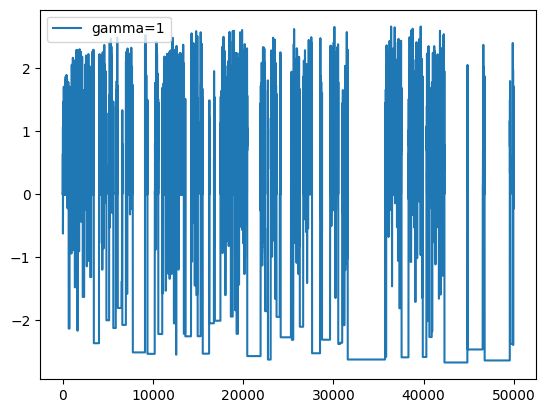

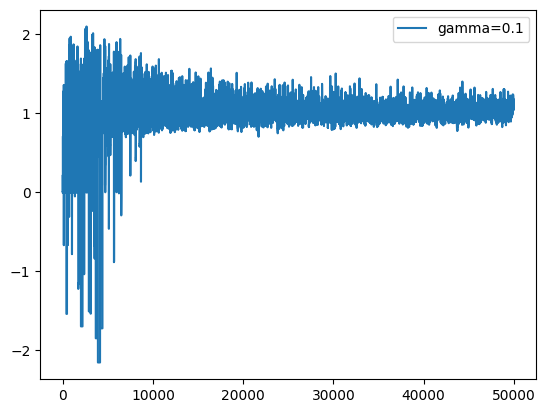

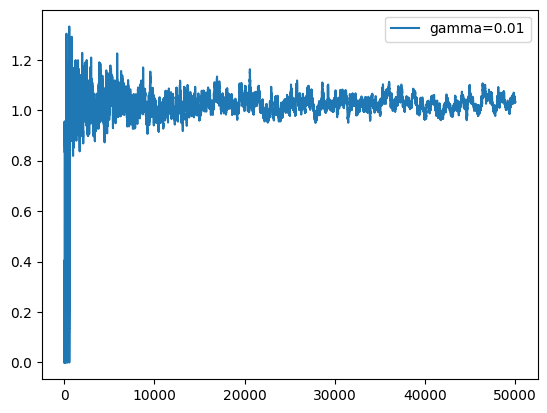

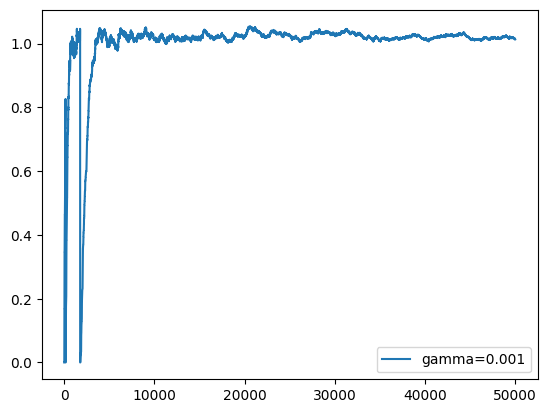

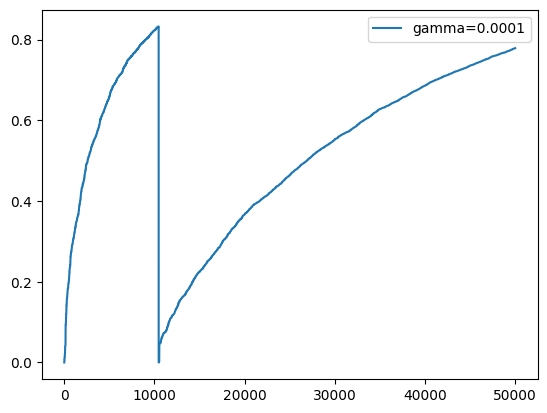

In [13]:
# l'évolution de (theta_n) en fonction de n:

def trace_theta_n (n : int , gamma : float  , beta : float) :
    theta_ = simultion_theta_n(n , gamma , beta)
    plt.plot(theta_ , label=f'gamma={gamma}')
    # plt.plot(x , theta_ )
    plt.legend()
    plt.show()

gamma_ = [ 1,0.1,0.01,0.001,0.0001]
for gamma in gamma_ :
    trace_theta_n(n , gamma , beta)


### Question 3:

In [19]:
# MC : 

def mc_importance(M :int , theta : float):
    G = np.random.normal(0,1,(M,1))   
    G = fun_psi(G,theta)*np.exp(-theta*G - theta**2/2)
    price = np.mean(G)
    stdev = np.sqrt(np.mean(G*G) - price**2)
    demi_ic = 1.96*stdev/np.sqrt(M)
    return (price , demi_ic)




### Question 4 ,5

In [23]:
# Test mc : 
theta = simultion_theta_n(n , gamma , beta)

price, demi_ic =  mc_importance(M , theta[-1])
print(f"pricing with importance sampling , theta = theta_n: {price} +/- {demi_ic}")

price, demi_ic =  mc_importance(M , np.mean(theta))
print(f"pricing with importance sampling , theta = mean(theta): {price} +/- {demi_ic}")
price, demi_ic =  mc_importance(M , 0)
print(f"pricing with MC naive: {price} +/- {demi_ic}")

pricing with importance sampling , theta = theta_n: 6.551790609549075 +/- 0.05961446681363934
pricing with importance sampling , theta = mean(theta): 6.5947636940770185 +/- 0.07693506616274684
pricing with MC naive: 6.647264357490729 +/- 0.13715458744693526


### Question 6

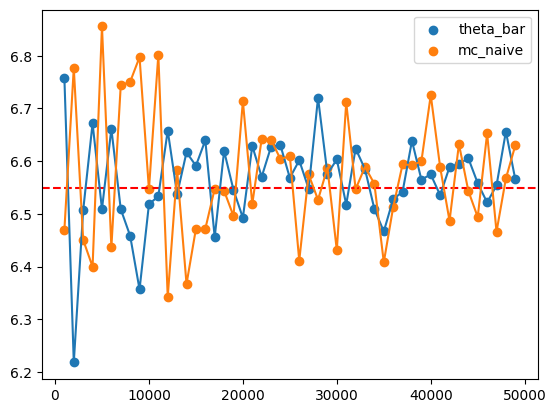

In [28]:
theta_bar = np.mean(theta)
nbs = np.arange(1000 , 50000 , 1000)
price_theta_bar = [mc_importance(M , theta_bar)[0] for M in range(1000, 50000 , 1000)]
price_mc = [mc_importance(M , 0)[0] for M in range(1000, 50000 , 1000)]
plt.axhline(y=6.55, color='r', linestyle='--')
plt.scatter(nbs , price_theta_bar ,label='theta_bar')
plt.plot(nbs , price_theta_bar)
plt.scatter(nbs ,  price_mc, label='mc_naive')
plt.plot(nbs , price_mc )

plt.legend()
plt.show()

